
# **Assignment - 1**

---
# **Prediction using Supervised ML : Simple Linear Regression.**
# **Author-Aryaditya Choudhury**

**Objective:**
The main objective of this problem is to predict the percentage of a student based on the no of study hours.

# **Resources**:

A CSV file of dataset that contains two variables 
1. Hours spent in studies.
2. Marks obtained.



**Importing the relevant packages.**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

**Importing the dataset.**

In [ ]:
df = pd.read_csv('Hours1.csv')

,Hours,Scores,Percentage
0,2.5,21,NaN
1,5.1,47,NaN
2,3.2,27,NaN
3,8.5,75,NaN
4,3.5,30,NaN
5,1.5,20,NaN
6,9.2,88,NaN
7,5.5,60,NaN
8,8.3,81,NaN
9,2.7,25,NaN


# Basic EDA

Dropping the column 'percentage' as it only contains with null values, so this becomes useless for our analysis and prediction. Instead the column 'scores' has been renamed as 'Percentage' because these all entries are out of 100 i.e this is indicating the percentage obtained by a student as well.

In [ ]:
df.drop('Percentage', axis = 1, inplace = True)

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df = df.rename(columns={'Scores' : 'Percentage'})

In [ ]:
df.head()

,Hours,Percentage
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Checking the missing values (if any)**

In [ ]:
df.isnull().sum()  

Hours         0
Percentage    0
dtype: int64

It is seen that there is no such missing values, thus we can proceed with the next operations.

**Assigning the feature and the target.**

We have assigned our feature i.e. 'Hours' to variable X, and our target i.e. 'Percentage' to variable y.

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


# Data Visualisation

In order to see the distribution of our dataset, we've shown a scatterplot below, to see how these two variable are related to each other.

Text(0, 0.5, 'Percentage obtained')

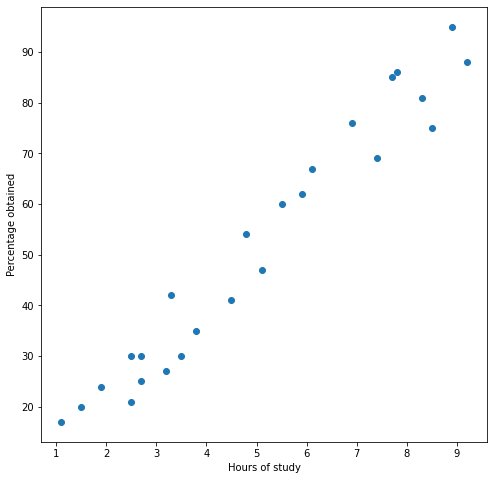

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(x = 'Hours', y = 'Percentage', data = df)
plt.xlabel('Hours of study')
plt.ylabel('Percentage obtained')

We can see that both the variables have positive relationship among them, also the datapoints are not much dispersed.

# Splitting the dataset

We've splitted our feature X and target y variable into X_train, X_test, y_train, y_test in order to fit the regression line upon train set, and predict by passing in the test feature.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

# Performing Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('The coefficient value is :', lr.coef_)   # beta1
print('The intercept value is : ', lr.intercept_)  # beta0
 #consider these two values when you're finding the the student percentage mark obtained when he studied the given much of time.
#ie y(percentage) = beta0 + beta1. X1(study hours)

The coefficient value is : [9.87171443]
The intercept value is :  1.495142109236383


# Performing Prediction

In [ ]:
y_pred = lr.predict(X_test)

# Score

Checking the R2 score of our linear regression model in order to get how will it gonna perform on our holdout set (test set)

In [ ]:
from sklearn.metrics import r2_score
R2_Score = r2_score(y_test, y_pred)

In [ ]:
print('R2 score value is : ', R2_Score)  #This value ensures the goodness of fit ie our exploratory variable has explained 93% of our target variable.

R2 score value is :  0.9309458862687437


We managed to obtain 93% of score which ensures that our regression model has performed pretty good on our holdout set.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


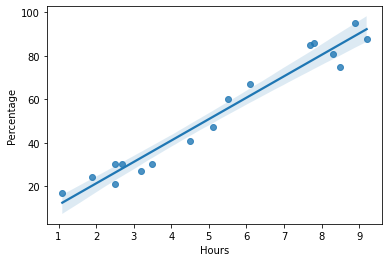

In [ ]:
sns.regplot(X_train, y_train)

We can see in the above figure, our regression line has fitted best opon our datapoints.

Now based on our model's prediction we can see if a student studies for 9.25 hrs per day, he's getting 93% of marks.

In [ ]:
print('The predicted percentage of a student if he studies 9.25 hrs/ day is : ', (lr.intercept_ + float(lr.coef_)* 9.25).round(), '%')

The predicted percentage of a student if he studies 9.25 hrs/ day is :  93.0 %
